# Tech interview - CPBI

I decided to work with the [investigation folders of **FGJ**](https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f "database link") of Mexico. I choose this database because I find very interesting to analize crime incidence in the country, specially in Mexico city, and figuring out what are the zones with the highest incidence of crime.

## Description of the database 

In this database there are the records of crime reported in the country, we can find the date, location and type of crime at every record.

## Plotting 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px

I'm going to set the column **fecha_hechos** as the index.

In [3]:
crime_records = pd.read_csv('../databases/carpetas_completa_abril_2022.csv', dtype='unicode', index_col = 'fecha_hechos')

Let's see what the first 5 rows to understand what we have:

In [79]:
crime_records.head()

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
fecha_hechos,,,,,,,,,,,,,,,,,,
2016-01-31 22:16:00,2016,Enero,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.1402149999999,19.3803149998337,NaN
2016-01-31 20:50:00,2016,Enero,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.1084029999999,19.3528589998337,NaN
2016-02-01 00:30:00,2016,Febrero,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.3564509998336,NaN
2016-01-31 22:00:00,2016,Enero,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.9763790000001,19.3316329998333,NaN
2015-12-25 12:00:00,2015,Diciembre,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.1721889999999,19.387113999834,NaN


We have the date of the record, the date of the crime, the crime, the fiscaly were it was recorded, the crime category and adress of the crime. 

We can analize what's going on with this records focusing on the frequency of the crimes and where they ocurr. 

First of all, I'm going to set the columns **fecha_hechos** and **fecha_inicio** as datetime objects.

In [4]:
crime_records.index = pd.to_datetime(crime_records.index, format = "%Y-%m-%d %H:%M:%S", errors = 'coerce')

In [5]:
crime_records['fecha_inicio'] = pd.to_datetime(crime_records['fecha_inicio'], format = "%Y-%m-%d %H:%M:%S", errors = 'coerce')

I'm going to focus just on the records in Mexico city, so, I will filter the database:

In [6]:
alcaldias_cdmx = ['AZCAPOTZALCO', 'ALVARO OBREGON', 'BENITO JUAREZ', 'COYOACAN', 'CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA', 'TLALPAN','TLAHUAC','VENUSTIANO CARRANZA','XOCHIMILCO']

In [7]:
crime_cdmx = crime_records[[locacion in alcaldias_cdmx for locacion in crime_records['alcaldia_hechos']]]

Now, we can see what is the crime incidence by mayors:

In [8]:
freq_crime_cdmx = crime_cdmx.groupby('alcaldia_hechos', as_index = False, group_keys = True)['delito'].count()

Now, I sort the values in descending order.

In [9]:
freq_crime_cdmx = freq_crime_cdmx.sort_values(by=['delito'], ascending = False)

The bar plot of this dataframe is the following:

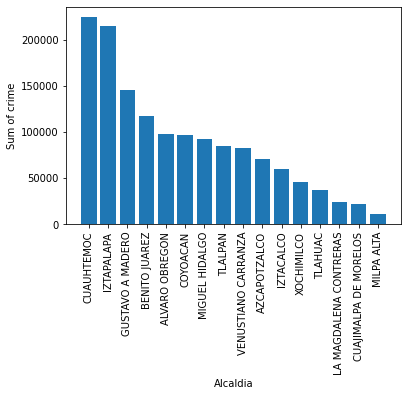

In [153]:
plt.bar(freq_crime_cdmx['alcaldia_hechos'], freq_crime_cdmx['delito'])
plt.xticks(rotation = 90)
plt.xlabel('Alcaldia')
plt.ylabel('Sum of crime')
plt.show()

In [1]:
#fig = px.histogram(freq_crime_cdmx, x = 'alcaldia_hechos', y = 'delito')
#fig.show()

As we can see, Cuaúhtemoc and Iztapalapa are the mayors with the highest crime incidence, meanwhile Cuajimalpa de Morelos and Milpa Alta have the lowest incidence.

Also, we can see with a pie chart what are the most frequent crimes by region. Because there are so many types of crime, I will show only the top 5 crimes by town hall.

First I'm going to make a dataframe with the frecuency of each crime according to each municipality.

In [13]:
crime_region_cdmx = crime_cdmx.groupby(['alcaldia_hechos','delito'], as_index = False, group_keys = True).size()

Then, I create a function which take the 5 most frequent crimes per municipality.

In [14]:
def top_5_crime(alcaldia):
    return crime_region_cdmx[crime_region_cdmx['alcaldia_hechos']
                                == alcaldia].sort_values('size', ascending = False).head()

As we see before, Cuaúhtemoc and Iztapalapa are the two municipalities with the highest number of records, meanwhile Milpa Alta and Cuajimalpa de Morelos are the municipalities with the lowest numbers. Let's see their pie charts with the top 5 crimes:

In [15]:
top_crime_cuauhtemoc = top_5_crime('CUAUHTEMOC')
top_crime_iztapalapa = top_5_crime('CUAUHTEMOC')

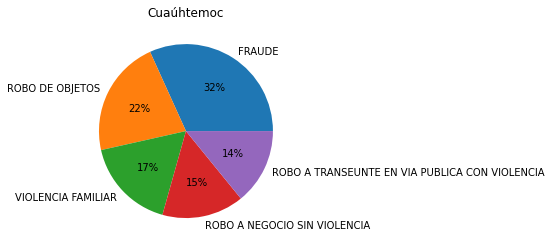

In [32]:
for alcaldia in ['CUAUHTEMOC','IZTAPALAPA','CUAJIMALPA DE MORELOS','MILPA ALTA']:
    plt.pie(list(top_crime_cuauhtemoc['size']), labels = list(top_crime_cuauhtemoc['delito']), autopct='%.0f%%')
    plt.title('Cuaúhtemoc')
plt.show()

In [21]:
#fig = px.sunburst(crime_cdmx, 
                  #path=['alcaldia_hechos', 'delito']
                 #)
#fig.show()

For example, in Cuaúhtemoc, fraud, objects theft and domestic violence are the most frequent crimes recorded. Meanwhile in Milpa Alta, domestic violence, threats and house robbery without violence are the most frequent ones.

## Visualization about the information

There is a lot to analize with this database, for example, we can check if the kind of crimes recorded is different month by month or quarter by quarter, and so on. Also, we can map the information to have a better idea of the crime incidence by zone.

But according what I present, the most interesting part is we can see what are the mayors with the highest crime incidence (Cuaúhtemoc and Iztapalapa) and what are the most recorded crimes, these results can lead us to the conclusion that population is a main factor for these incidences, because Cuaúhtemoc and Iztapalapa are the most populated mayors.

## Machine learning algorithms

In this database I can use linear regression to figure out if a certain crime at a certain mayor or at certain time scale is increasing or decreasing.

I can also use PCA over the mayors to reduce dimensionality and see how they cluster.

Other clustering algorithm I can use is k means which, setting the number of clusters, _inertia_ can be computed to find the best number of clusters, of course, being carefult to not have many clusters.

## Selecting one of the algorithms

## Life cycle of the model

## Frameworks and libraries for the project 

## Bonus 